In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Amostragem Aleatória Simples
Desafio: Crie um DataFrame com 1000 registros de alunos, incluindo colunas para
**ID**, **Idade** e **Nota**. 

Realize uma amostragem aleatória simples de 100 alunos e
analise a média e a mediana das notas da amostra.
- Objetivo: Praticar a amostragem e entender as medidas de tendência central.

In [25]:
# Carregar a planilha (substitua o caminho do arquivo pelo caminho correto no seu sistema)
df_alunos = pd.read_csv('/home/wermelingerv/Documentos/GitHub/SoulCode/Bootcamp - ANALISE DE DADOS/Exercicio Estatística/MOCK_ALUNO.csv')

# Exibir as primeiras linhas para verificar o conteúdo
print(df_alunos.head())

   ID  Idade  Nota             Nome
0  79     30   5.6   Gustavo Nieass
1  43     19   0.6  Tammie Sutherns
2  35     20   4.1    Jordon Ruston
3  32     27   9.8      Benny Regan
4   6     22   5.1    Palmer Guerra


In [26]:
# Definindo o tamanho da amostra
amostra = 100

# Realizando a amostragem aleatória simples
amostra_df = df_alunos.sample(n=amostra, random_state=42)
display(amostra_df)

# Analisando a média e a mediana das notas
media_nota = amostra_df['Nota'].mean()
mediana_nota = amostra_df['Nota'].median()

# Exibindo os resultados
print("Média das Notas da Amostra:", media_nota)
print("Mediana das Notas da Amostra:", mediana_nota)


,ID,Idade,Nota,Nome
521,68,19,5.5,Ario Hambling
737,11,23,0.6,Dorry Pauncefoot
740,52,28,7.9,Seline Stive
660,82,23,7.4,Floyd Ledram
411,94,30,8.8,Danielle Henstone
...,...,...,...,...
436,95,30,3.9,Deerdre Gartan
764,27,22,6.3,Gorden Riddock
88,84,18,7.6,Myrilla Cutchey
63,27,23,9.2,Del Camel


Média das Notas da Amostra: 5.221
Mediana das Notas da Amostra: 5.55


## 2. Boxplot e Identificação de Outliers
Desafio: Use o DataFrame criado no desafio anterior e adicione uma coluna **Nota** com notas variando de 0 a 100. Plote um boxplot para as notas e identifique os outliers.
- Objetivo: Visualizar a distribuição das notas e entender o conceito de outliers.

   ID  Idade  Nota             Nome      Nota1
0  79     30   5.6   Gustavo Nieass  37.454012
1  43     19   0.6  Tammie Sutherns  95.071431
2  35     20   4.1    Jordon Ruston  73.199394
3  32     27   9.8      Benny Regan  59.865848
4   6     22   5.1    Palmer Guerra  15.601864


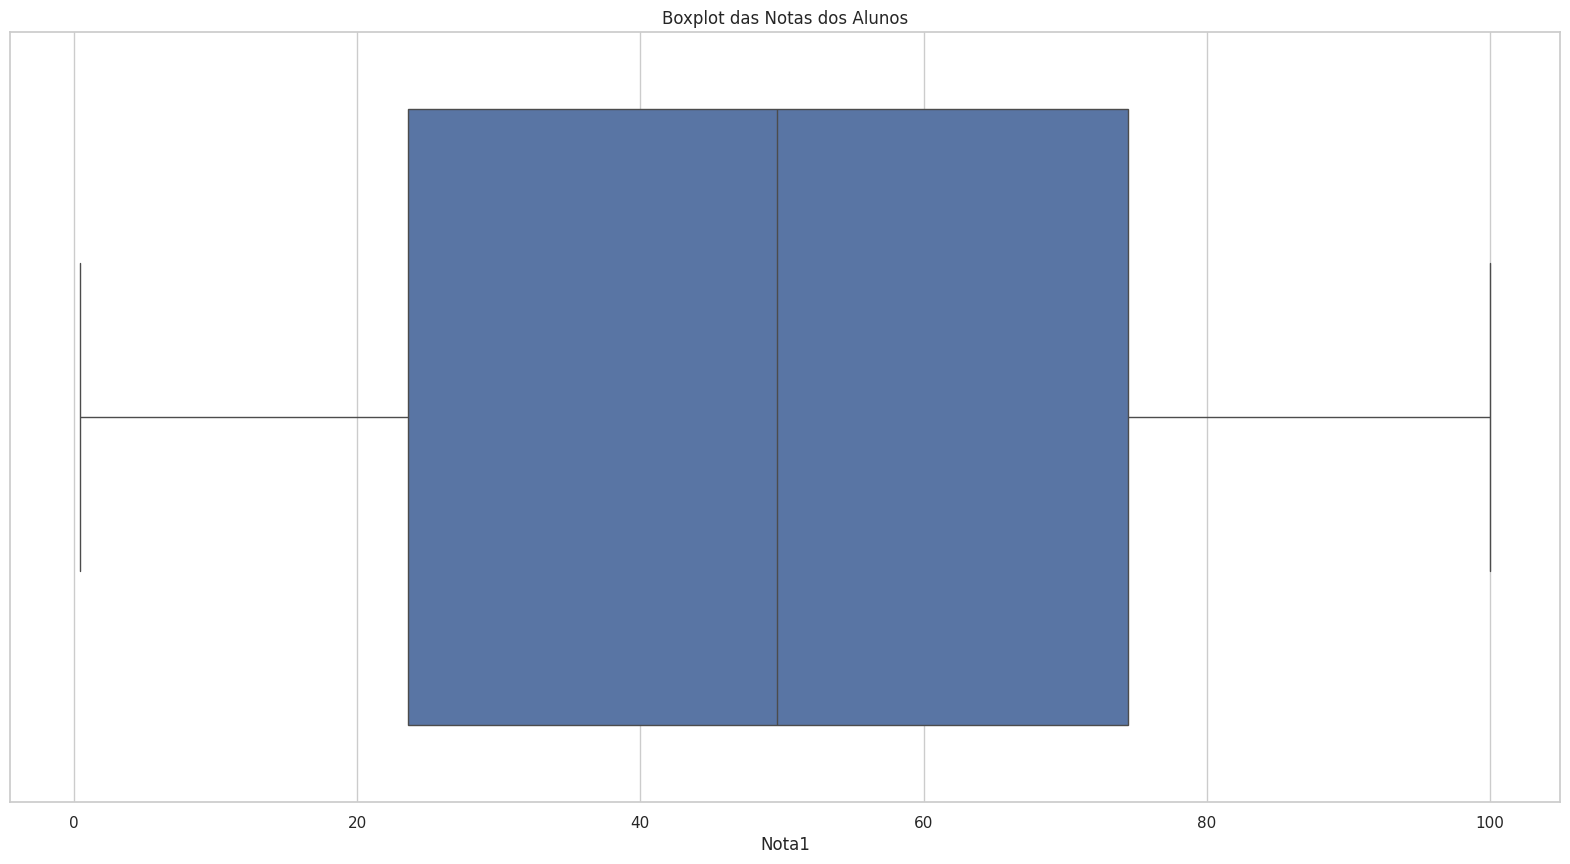

In [27]:
# Adicionando a coluna 'Nota' com notas variando de 0 a 100
np.random.seed(42) 
df_alunos['Nota1'] = np.random.uniform(0, 100, df_alunos.shape[0])  

# Exibir as primeiras linhas para verificar a nova coluna
print(df_alunos.head())

# Criando o boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x=df_alunos['Nota1'])
plt.title('Boxplot das Notas dos Alunos')
plt.xlabel('Nota1')
plt.show()



In [31]:
# Identificando outliers
Q1 = df_alunos['Nota1'].quantile(0.25)
Q3 = df_alunos['Nota1'].quantile(0.75)
IQR = Q3 - Q1  # Intervalo Interquartílico

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_alunos[(df_alunos['Nota1'] < limite_inferior) | (df_alunos['Nota1'] > limite_superior)]

# Exibindo os outliers identificados
print("Outliers identificados:")
print(outliers)

Outliers identificados:
Empty DataFrame
Columns: [ID, Idade, Nota, Nome, Nota1, Horas de Estudo]
Index: []


## 3. Histograma para Frequência
Desafio: Plote um histograma das idades dos alunos do DataFrame anterior, dividindo as idades em intervalos (bins) apropriados.
- Objetivo: Analisar a frequência das idades e entender a distribuição de dados.

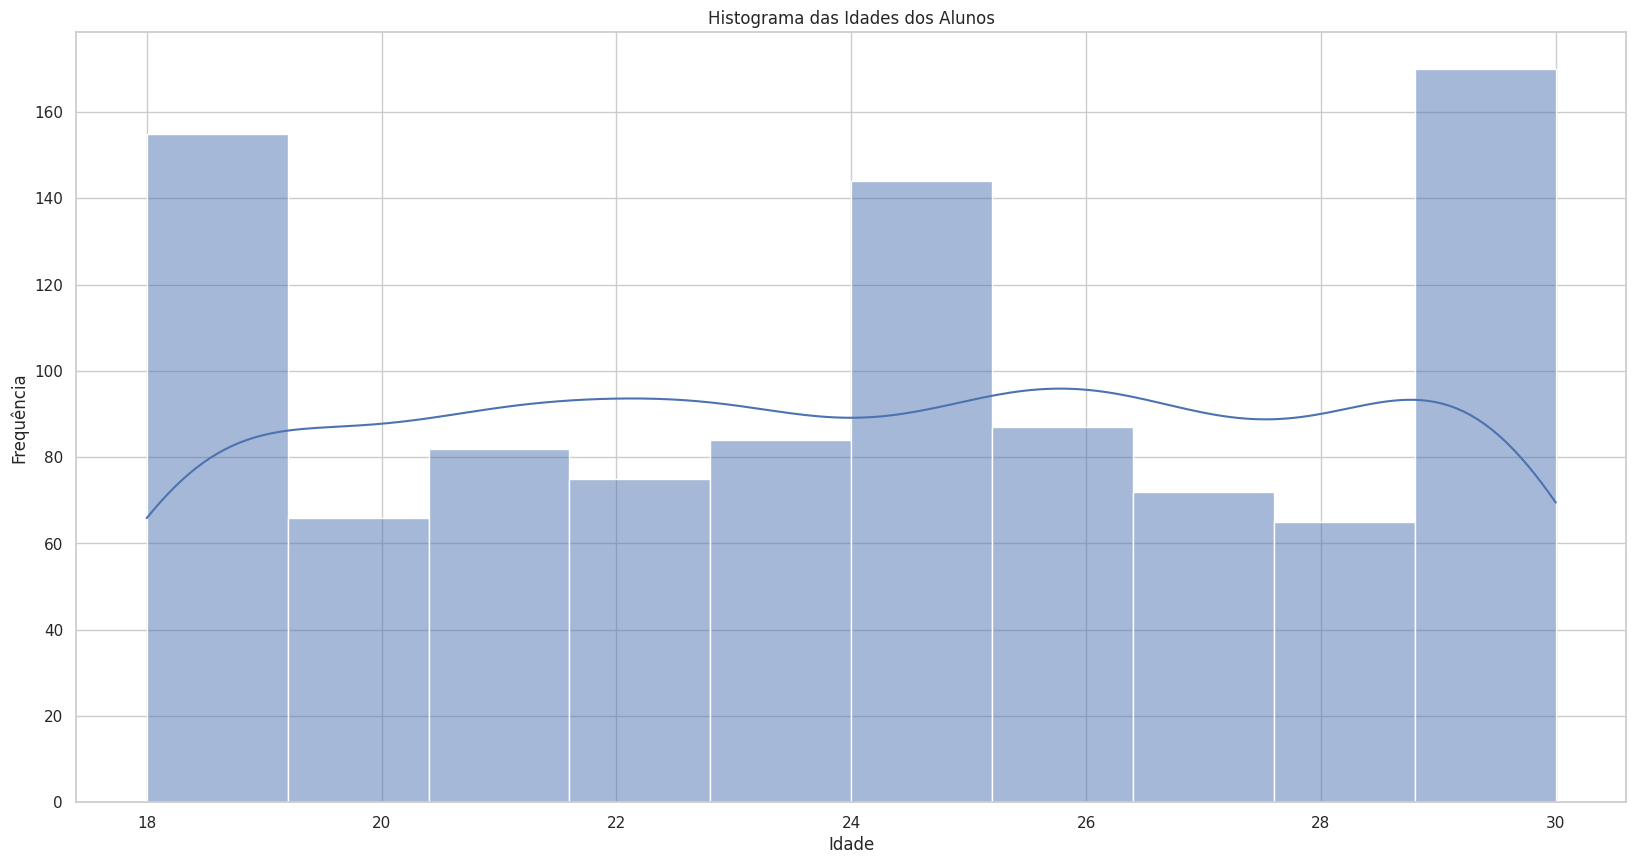

In [32]:
# Criando o histograma
plt.figure(figsize=(20, 10))
sns.histplot(df_alunos['Idade'], bins=10, kde=True)  
plt.title('Histograma das Idades dos Alunos')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

## 4. Cálculo de Covariância
Desafio: Adicione uma coluna **Horas de Estudo** ao DataFrame anterior. 
Calcule a covariância entre **Horas de Estudo** e **Nota**.
- Objetivo: Compreender a relação entre duas variáveis.

In [33]:
# Adicionar a coluna 'Horas de Estudo' com valores entre 0 e 10
df_alunos['Horas de Estudo'] = np.random.uniform(0, 10, df_alunos.shape[0])

# Exibir as primeiras linhas para verificar as colunas adicionadas
print(df_alunos.head())

# Calcular a covariância entre 'Horas de Estudo' e 'Nota'
covariancia = df_alunos[['Horas de Estudo', 'Nota']].cov()

# Exibir a matriz de covariância
print("Matriz de Covariância:")
print(covariancia)

   ID  Idade  Nota             Nome      Nota1  Horas de Estudo
0  79     30   5.6   Gustavo Nieass  37.454012         2.617057
1  43     19   0.6  Tammie Sutherns  95.071431         2.469788
2  35     20   4.1    Jordon Ruston  73.199394         9.062546
3  32     27   9.8      Benny Regan  59.865848         2.495462
4   6     22   5.1    Palmer Guerra  15.601864         2.719497
Matriz de Covariância:
                 Horas de Estudo      Nota
Horas de Estudo         8.449149  0.274909
Nota                    0.274909  8.245057
